In [2]:
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

In [3]:
df=pd.read_csv(r'..\..\data\Cleaned_data\cancat.csv')

In [3]:
df.head()

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Kataragama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile


In [4]:
df=df[df["Cause of Death"]!='Unknown']

Group Data by Region and Population:
+ Group the data by the 'Region' and 'District' columns to analyze variations in causes of death within different regions and populations:

In [5]:
grouped = df.groupby(['District'])

Count Causes of Death:
+ Count the occurrences of each cause of death within each region and population:


In [6]:
df['Cause of Death'].value_counts()

Cause of Death
Gunshot                  403
Hakkapatas               299
Electrocuted             169
Natural                   87
Accident                  77
Train Accident            76
Poisned                   71
Other                     67
Injured                   45
Body destroyed            40
Disease                   21
Fallen into well          15
Septicemia                13
Land mine                 10
Attack by an elephant     10
Flood                      6
Drowned                    6
Eaten polythene            6
Lightning                  4
Broken the Spinal          3
At born                    3
Falling of a mountain      2
Garbage consumption        1
Liver floot                1
Severe hemorrhage          1
Nivukeniya                 1
Drought                    1
Name: count, dtype: int64

In [7]:
cause_counts = grouped['Cause of Death'].value_counts().unstack(fill_value=0)


In [8]:
cause_counts

Cause of Death,Accident,At born,Attack by an elephant,Body destroyed,Broken the Spinal,Disease,Drought,Drowned,Eaten polythene,Electrocuted,...,Land mine,Lightning,Liver floot,Natural,Nivukeniya,Other,Poisned,Septicemia,Severe hemorrhage,Train Accident
District,,,,,,,,,,,,,,,,,,,,,
Ampara,5,0,1,8,0,7,0,1,2,18,...,1,0,0,8,0,8,11,10,0,0
Anuradhapura,15,0,3,2,0,0,0,0,0,38,...,1,4,0,4,1,7,16,0,0,11
Badulla,2,0,0,4,0,0,0,0,0,5,...,0,0,0,2,0,1,0,0,0,0
Batticaloa,1,0,0,0,0,0,0,0,1,18,...,0,0,0,2,0,2,4,1,0,3
Hambantota,4,1,1,5,0,1,0,0,0,20,...,0,0,1,6,0,7,2,0,0,0
Kandy,1,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
Kilinochchi,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Kurunegala,9,0,1,2,1,0,1,0,0,14,...,1,0,0,2,0,2,13,0,0,10
Mannar,1,0,0,1,0,2,0,0,0,1,...,2,0,0,0,0,1,0,0,0,0


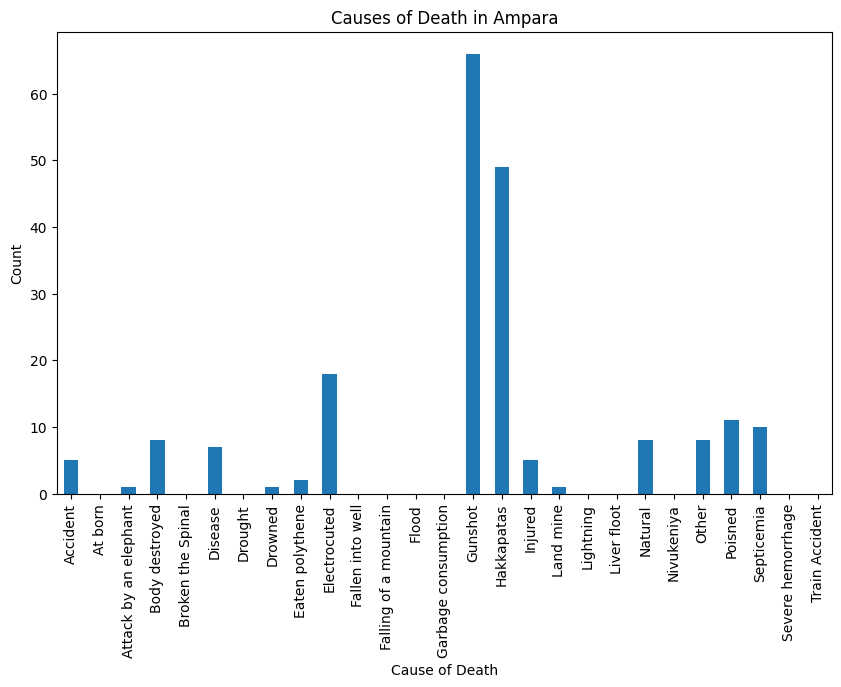

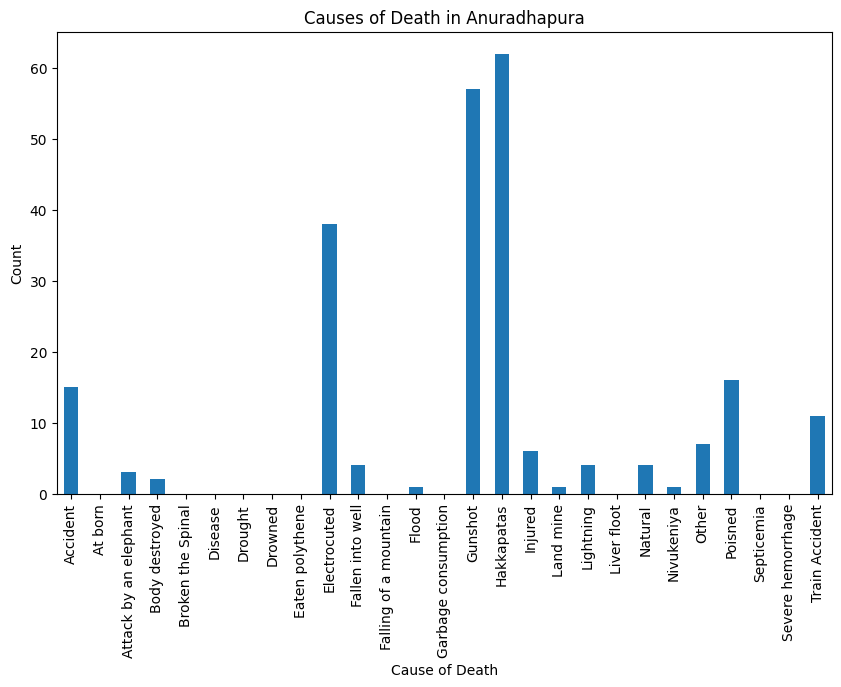

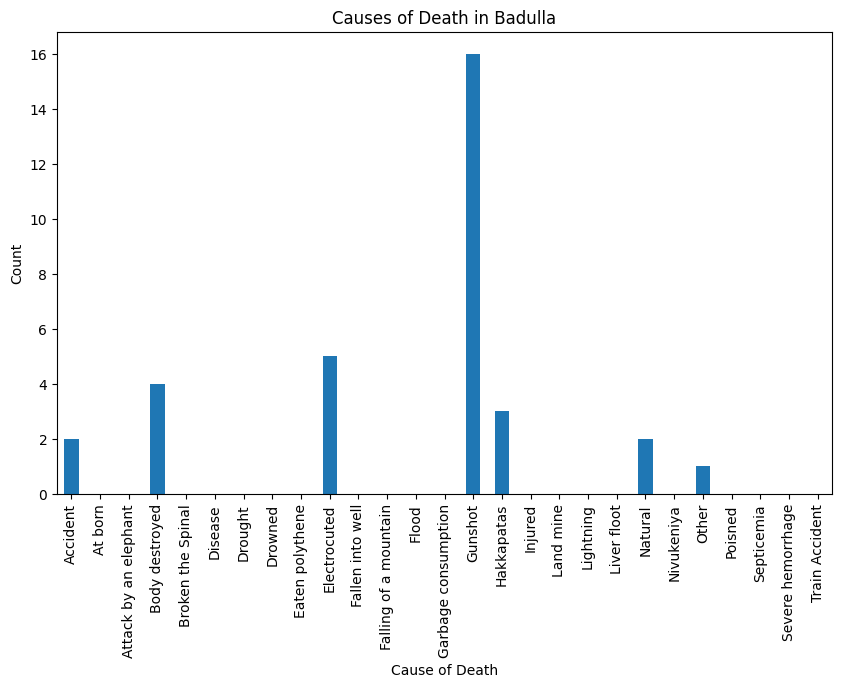

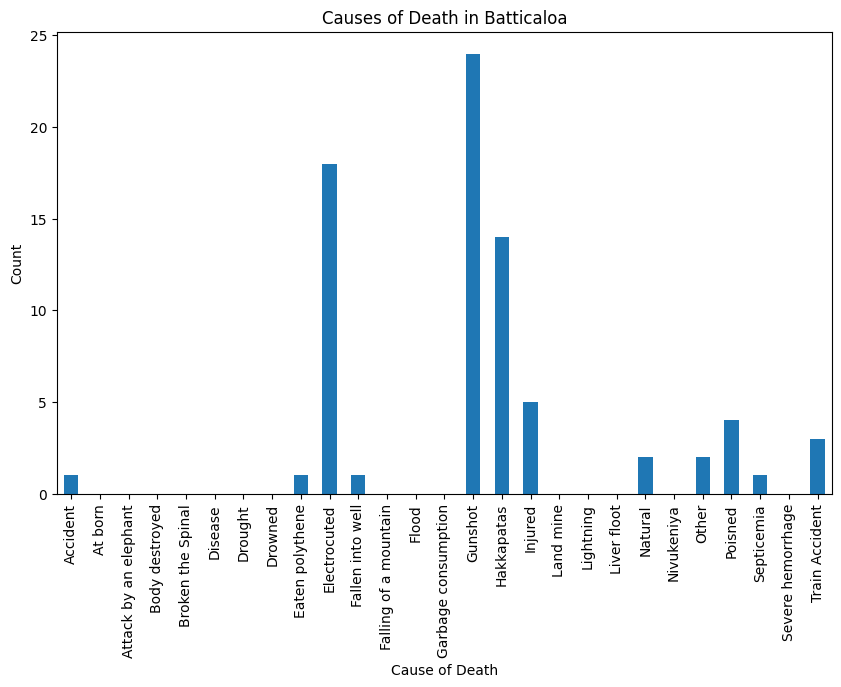

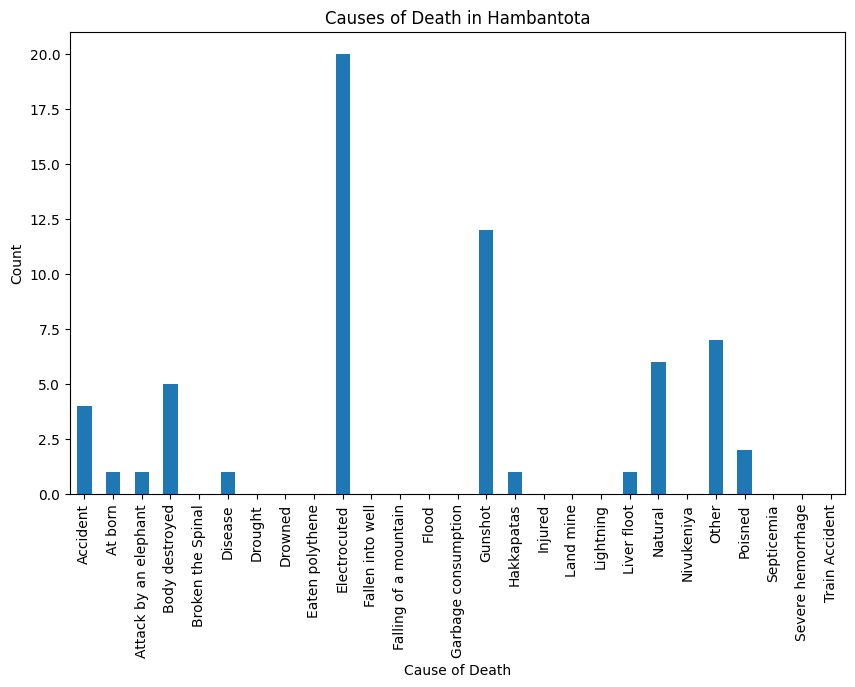

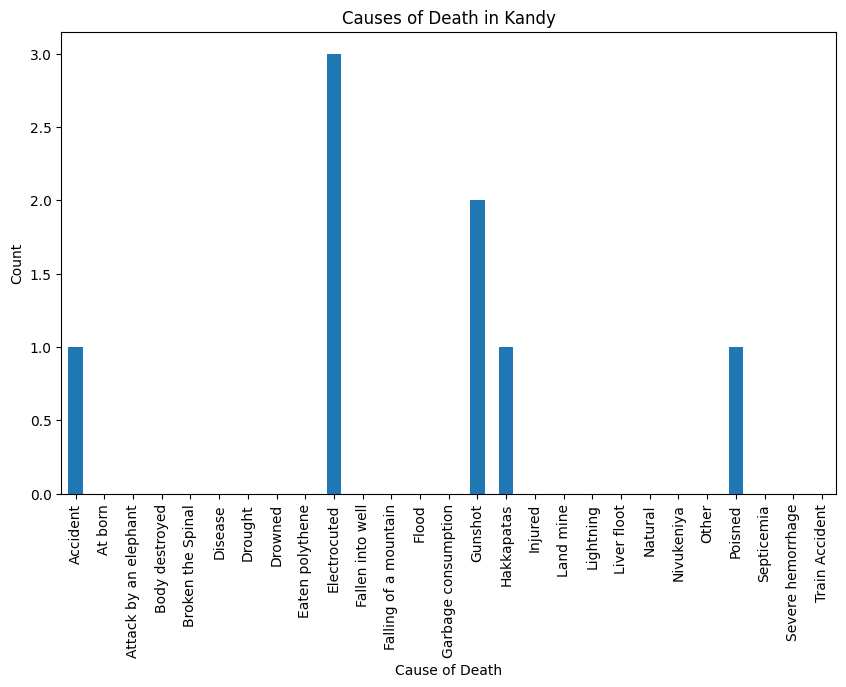

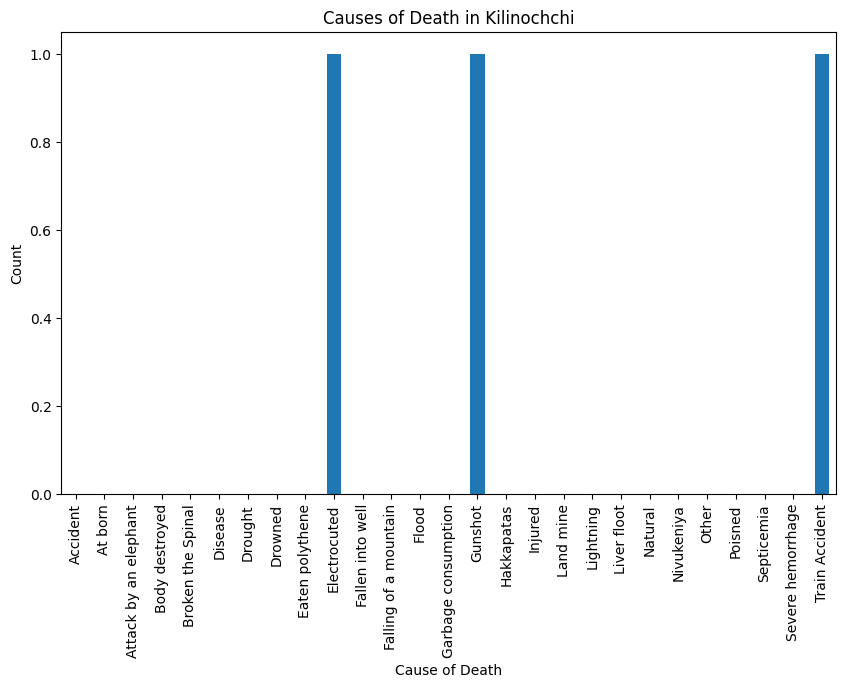

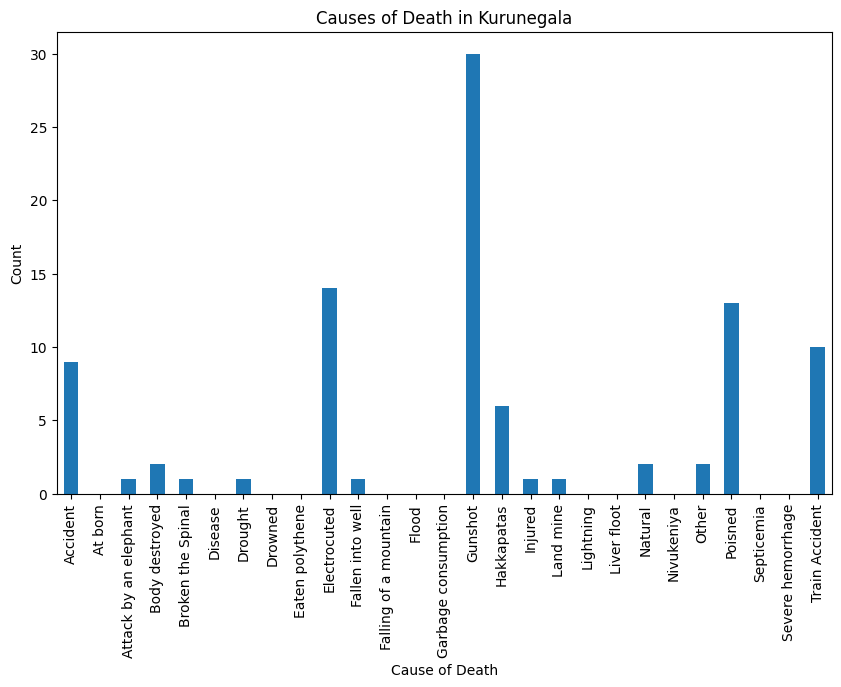

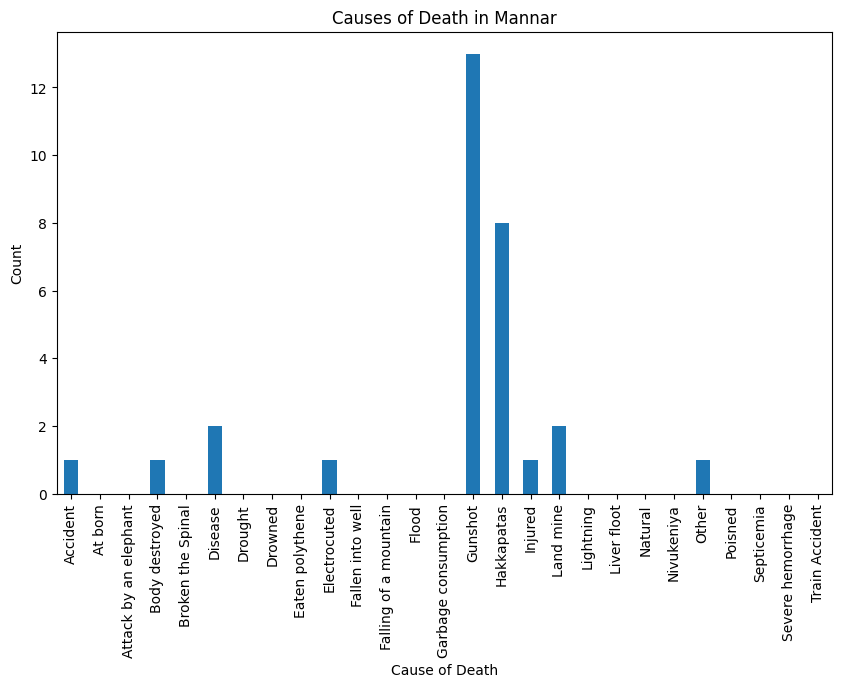

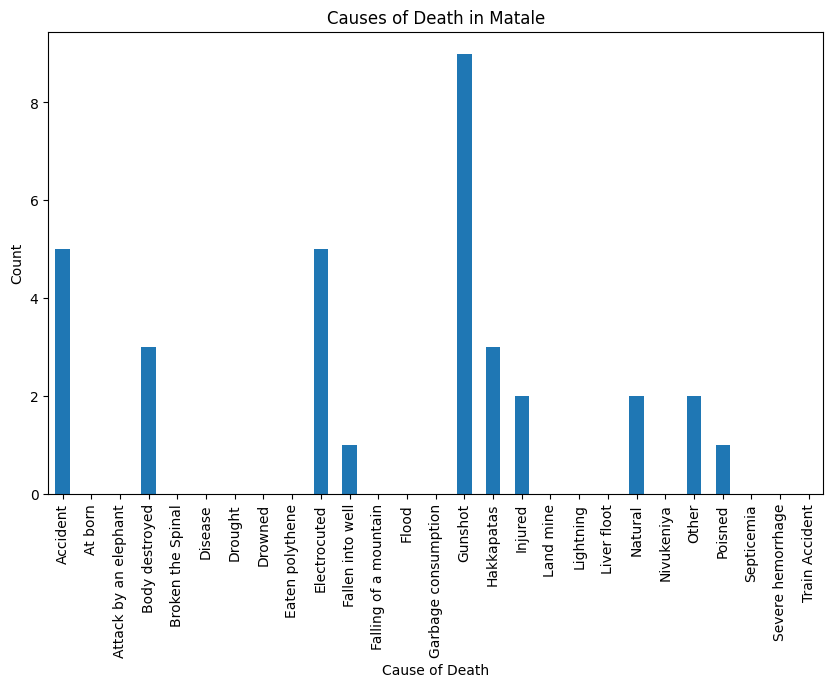

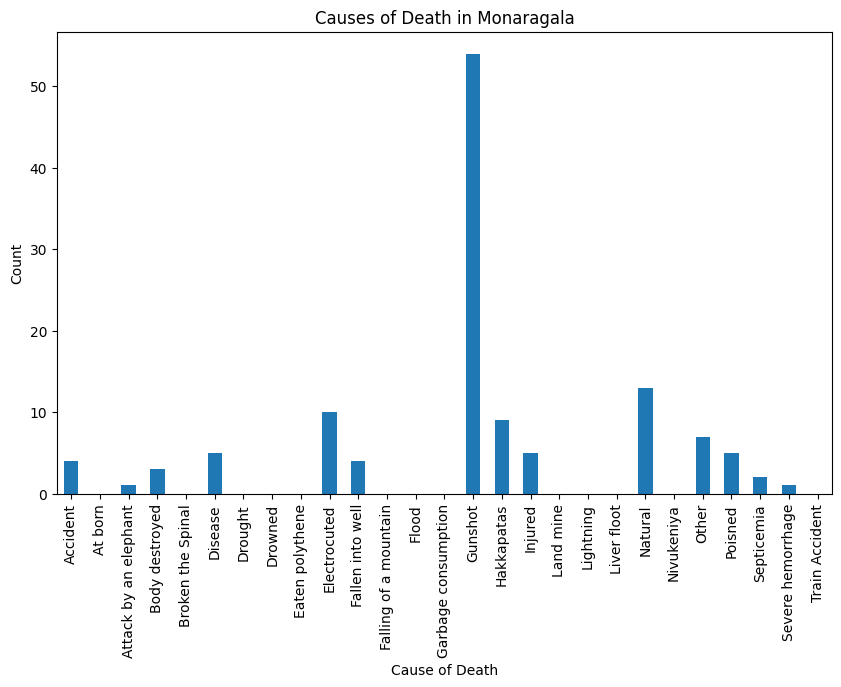

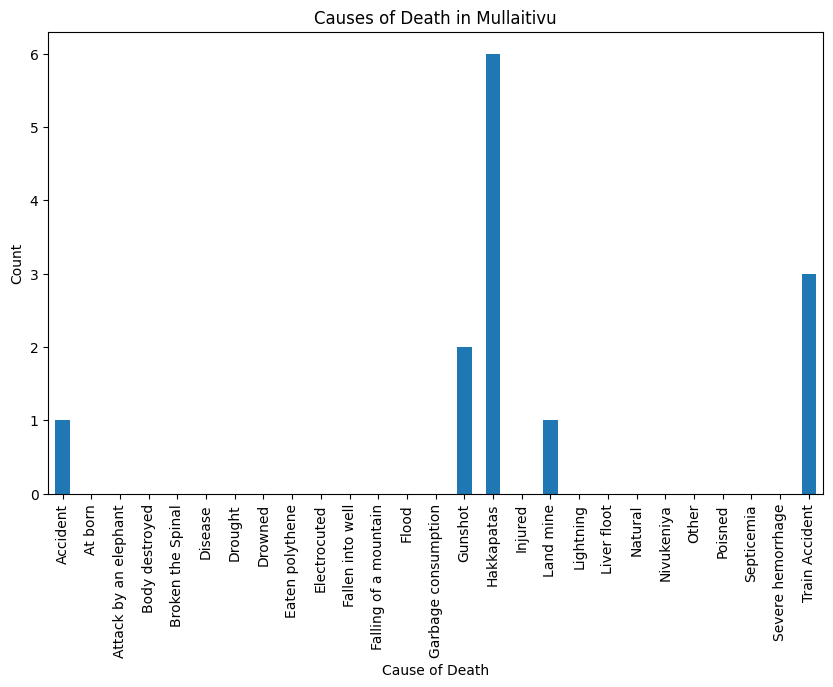

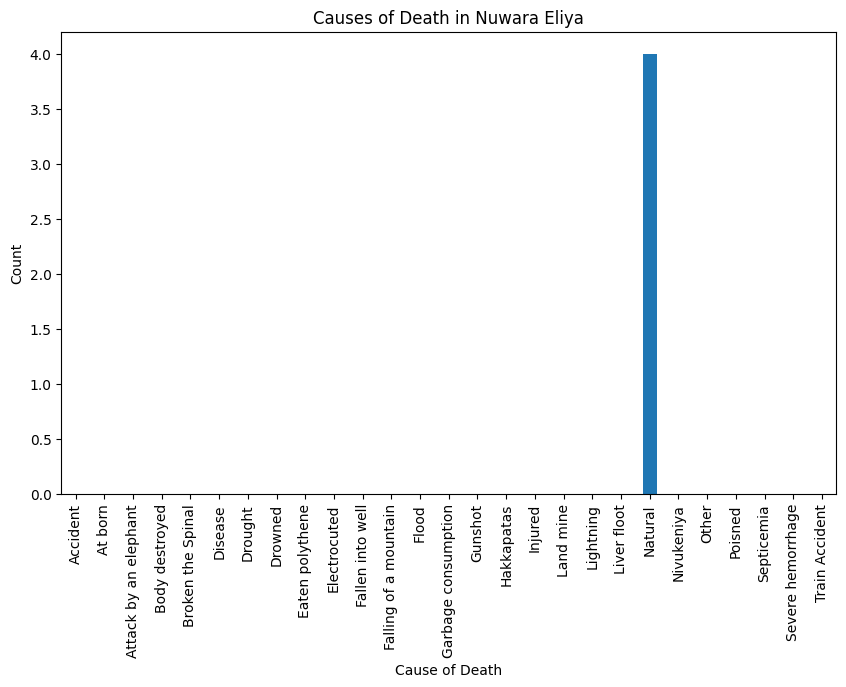

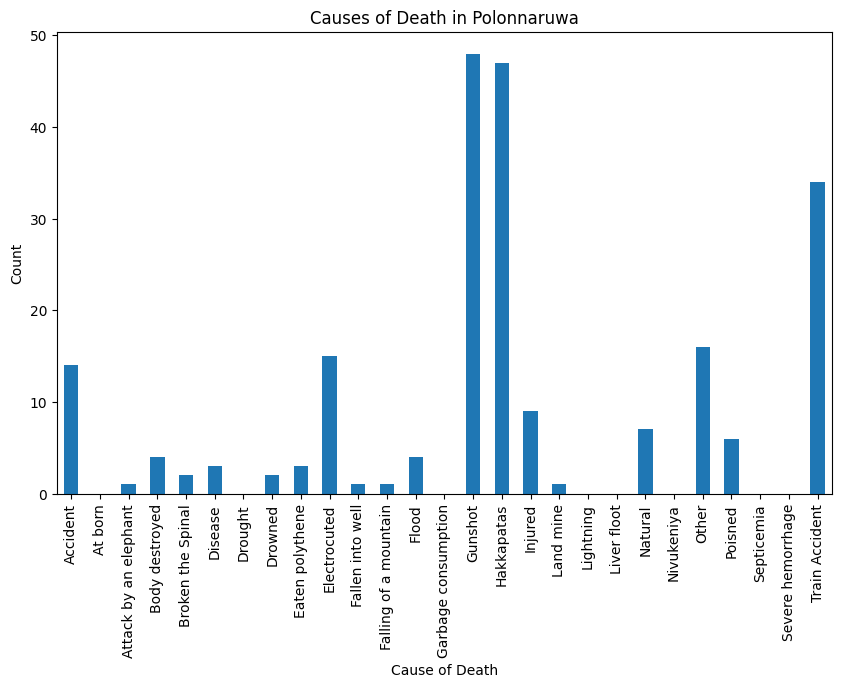

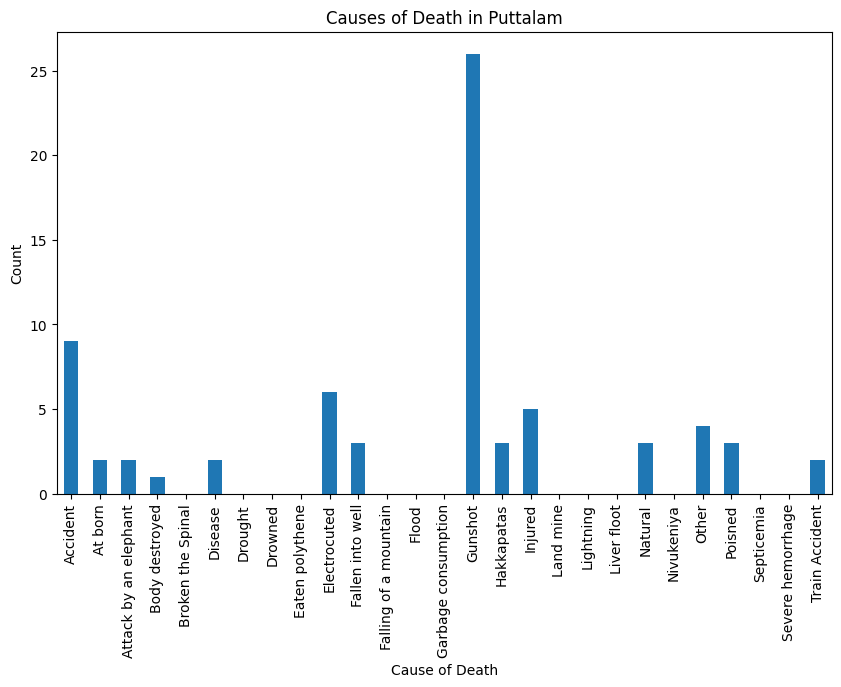

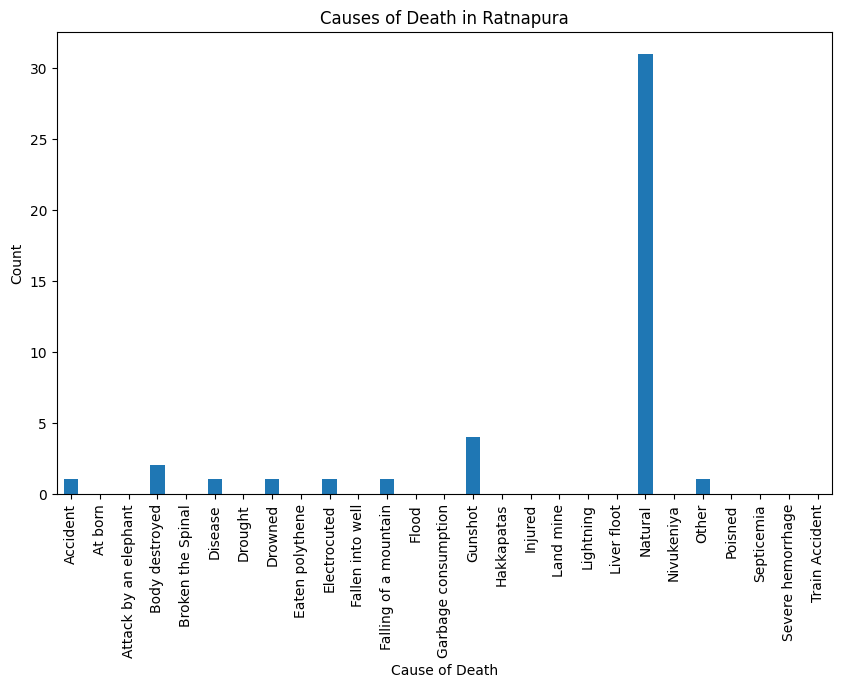

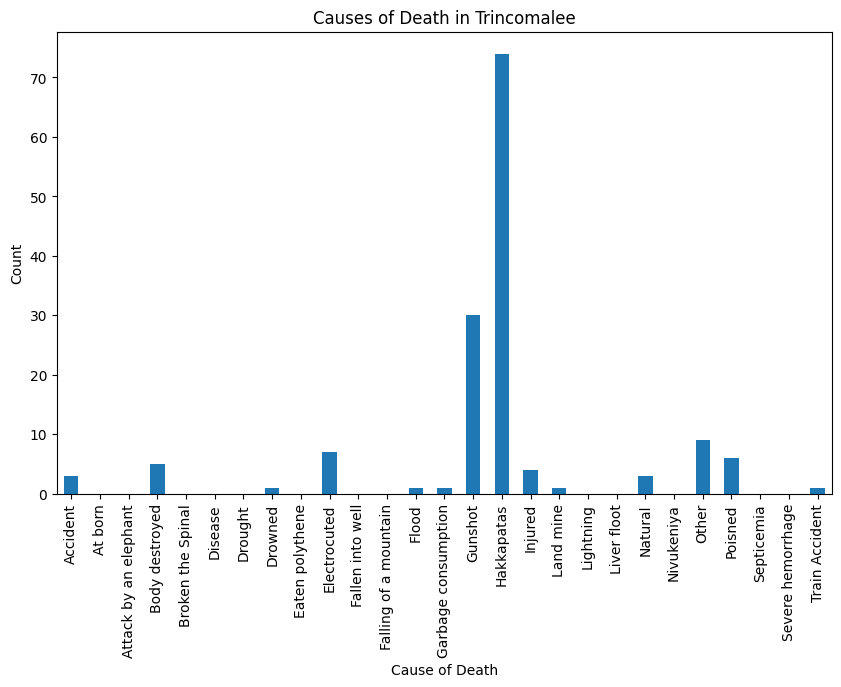

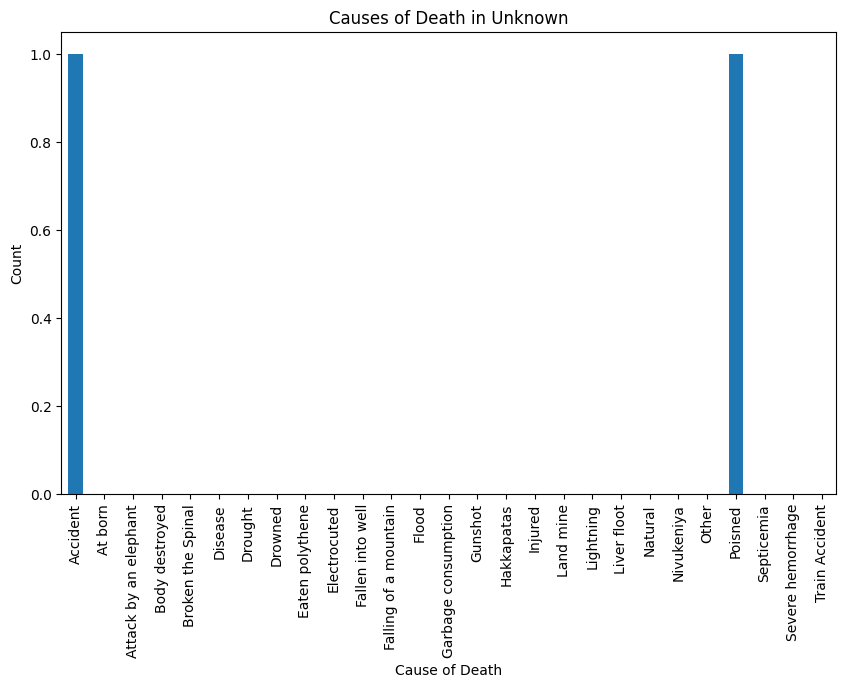

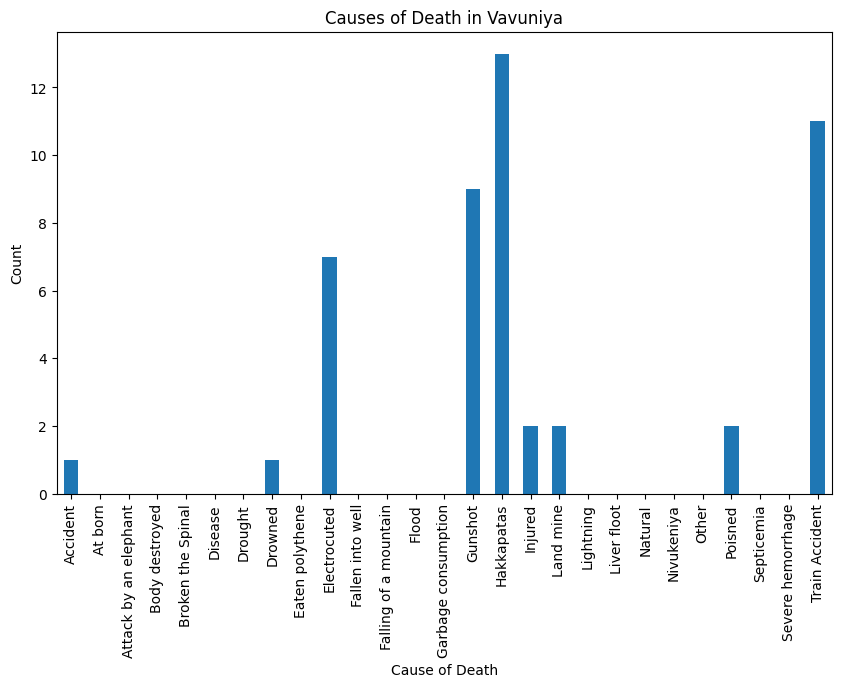

In [9]:
# Plot a bar chart for each region and population
for group, data in cause_counts.iterrows():
    district = group
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', title=f'Causes of Death in {district}')
    plt.xlabel('Cause of Death')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


Identify Common Causes of Death:

In [10]:
common_causes = cause_counts.apply(lambda x: x.idxmax(), axis=1)


In [11]:
common_causes=pd.DataFrame(common_causes)

In [12]:
common_causes.reset_index(inplace=True)


In [13]:
common_causes = common_causes.rename(columns={0: 'CommonCause'})


In [14]:
common_causes

,District,CommonCause
0,Ampara,Gunshot
1,Anuradhapura,Hakkapatas
2,Badulla,Gunshot
3,Batticaloa,Gunshot
4,Hambantota,Electrocuted
5,Kandy,Electrocuted
6,Kilinochchi,Electrocuted
7,Kurunegala,Gunshot
8,Mannar,Gunshot
9,Matale,Gunshot


In [15]:
# Load the district shapefile
districts = gpd.read_file(r'..\..\data\Map_file\District_geo.json')

In [16]:
districts.head()

,ADM2_EN,ADM2_SI,ADM2_TA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1SI,ADM2ALT2SI,ADM2ALT1TA,...,ADM0_EN,ADM0_SI,ADM0_TA,ADM0_PCODE,Shape_Leng,Shape_Area,date,validOn,validTo,geometry
0,[unknown],[unknown],[unknoபுத்தளம் மாவட்ட,LK60,,,,,,,...,Sri Lanka,ශ්‍රී ලංකා,இலங்கை,LK,0.286741,0.002137,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((79.82493 7.78566, 79.82341 7.78844, ..."
1,Ampara,අම්පාර දිස්ත්‍රික,அம்பாறை மாவட்டம்,LK52,,,,,,,...,Sri Lanka,ශ්‍රී ලංකා,இலங்கை,LK,5.397133,0.366562,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((81.75144 7.45764, 81.74739 7.45469, ..."
2,Anuradhapura,අනුරාධපුර දිස්ත්‍,அனுராதபுரம் மாவட்,LK71,,,,,,,...,Sri Lanka,ශ්‍රී ලංකා,இலங்கை,LK,4.539544,0.592676,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((80.93922 8.34202, 80.93707 8.34614, ..."
3,Badulla,බදුල්ල දිස්ත්‍රික,பதுளை மாவட்டம்,LK81,,,,,,,...,Sri Lanka,ශ්‍රී ලංකා,இலங்கை,LK,3.940419,0.235108,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((81.26884 7.27764, 81.26596 7.28468, ..."
4,Batticaloa,මඩකලපුව දිස්ත්‍රි,மட்டக்களப்பு மாவட,LK51,,,,,,,...,Sri Lanka,ශ්‍රී ලංකා,இலங்கை,LK,6.468261,0.203262,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((81.72618 7.63616, 81.72664 7.6..."


In [17]:
# Rename the district column to 'District'
districts.rename(columns={'ADM2_EN': 'District'}, inplace=True)

In [18]:
# Remove the 'unknown' district
districts = districts[districts['District'] != '[unknown]']

In [19]:
# Merge the data with district boundaries data
merged_data_all = districts.merge(common_causes, on='District', how='left')

In [20]:
merged_data_all.head()

,District,ADM2_SI,ADM2_TA,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1SI,ADM2ALT2SI,ADM2ALT1TA,...,ADM0_SI,ADM0_TA,ADM0_PCODE,Shape_Leng,Shape_Area,date,validOn,validTo,geometry,CommonCause
0,Ampara,අම්පාර දිස්ත්‍රික,அம்பாறை மாவட்டம்,LK52,,,,,,,...,ශ්‍රී ලංකා,இலங்கை,LK,5.397133,0.366562,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((81.75144 7.45764, 81.74739 7.45469, ...",Gunshot
1,Anuradhapura,අනුරාධපුර දිස්ත්‍,அனுராதபுரம் மாவட்,LK71,,,,,,,...,ශ්‍රී ලංකා,இலங்கை,LK,4.539544,0.592676,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((80.93922 8.34202, 80.93707 8.34614, ...",Hakkapatas
2,Badulla,බදුල්ල දිස්ත්‍රික,பதுளை மாவட்டம்,LK81,,,,,,,...,ශ්‍රී ලංකා,இலங்கை,LK,3.940419,0.235108,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((81.26884 7.27764, 81.26596 7.28468, ...",Gunshot
3,Batticaloa,මඩකලපුව දිස්ත්‍රි,மட்டக்களப்பு மாவட,LK51,,,,,,,...,ශ්‍රී ලංකා,இலங்கை,LK,6.468261,0.203262,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"MULTIPOLYGON (((81.72618 7.63616, 81.72664 7.6...",Gunshot
4,Colombo,කොළඹ දිස්ත්‍රික්ක,கொழும்பு மாவட்டம்,LK11,,,,,,,...,ශ්‍රී ලංකා,இலங்கை,LK,1.887285,0.056092,2019-03-04 00:00:00+00:00,2020-03-05 00:00:00+00:00,1899-11-30 00:00:00+00:00,"POLYGON ((80.17721 6.97725, 80.16917 6.97930, ...",NaN


In [21]:
merged_data_all['CommonCause'].fillna('No Deaths', inplace=True)

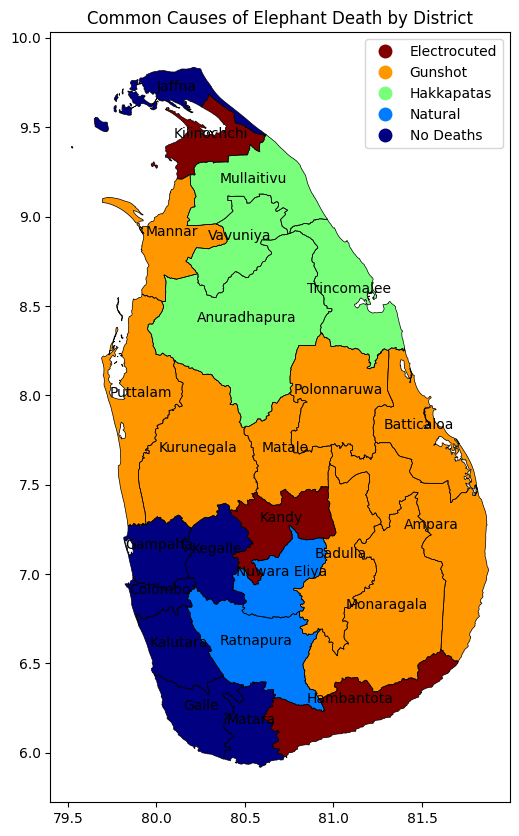

In [22]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data_all.boundary.plot(ax=ax, linewidth=.5, color='black')
merged_data_all.plot(column='CommonCause', cmap='jet_r', linewidth=0.8, ax=ax, legend=True)
merged_data_all.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)
ax.set_title('Common Causes of Elephant Death by District')
plt.show()

For year wise

In [23]:
@interact(year=widgets.IntSlider(value=2010, min=2010, max=2017, step=1, description='Year'))
def plot_map(year):
    clear_output(wait=True)
    # Load and process your data for the selected year
    df = pd.read_csv(f'D:/UOP/4th year/Research/EDA/Data/{year}_clean.csv')
    df = df[df["Cause of Death"] != 'Unknown']
    grouped = df.groupby(['District'])
    cause_counts = grouped['Cause of Death'].value_counts().unstack(fill_value=0)
    common_causes = cause_counts.apply(lambda x: x.idxmax(), axis=1)
    common_causes = common_causes.rename('CommonCause')
    
    # Get the number of deaths for each cause
    cause_deaths = cause_counts.max(axis=1)
    cause_deaths = cause_deaths.rename('NumDeaths')
    
    # Merge data with district boundaries data
    merged_data = districts.merge(common_causes, on='District', how='left')
    merged_data = merged_data.merge(cause_deaths, on='District', how='left')
    merged_data['CommonCause'].fillna('No Deaths', inplace=True)
    merged_data['NumDeaths'].fillna(0, inplace=True)

    # Create a Plotly map for the selected year
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_data_all.boundary.plot(ax=ax, linewidth=.5, color='black')
    merged_data.plot(column='CommonCause', cmap='Accent', linewidth=0.8, ax=ax, legend=True)
    
    
    merged_data.apply(lambda x: ax.annotate(text=str(int(x['NumDeaths'])), xy=x.geometry.centroid.coords[0], ha='center', va='top'), axis=1)
    merged_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)
        
    plt.title(f'Common Causes of Elephant Death by District ({year})')
    plt.show()

interactive(children=(IntSlider(value=2010, description='Year', max=2017, min=2010), Output()), _dom_classes=(…